In [1]:
#VIERNES A LAS 13:00
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import wrf
# ds083  GFS    NAM
# 1deg   0.5deg  12km
# p1s1   p2s2   p7s7
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/north-american-mesoscale-forecast-system-nam
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs


from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np, interplevel, vertcross, CoordPair, latlon_coords
from matplotlib.cm import get_cmap
from matplotlib.ticker import FormatStrFormatter
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import smooth2d, get_cartopy, cartopy_xlim, cartopy_ylim

C:\Users\dell\Anaconda3\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_gfs05_p2r5',
           '20120816_d03_nam32_p1r1', '20120816_d03_nam32_p1r3','20120816_d03_nam32_p1r5',
           '20120816_d03_nam32_p2r1', '20120816_d03_nam32_p2r3','20120816_d03_nam32_p2r5' ]
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5', 
            'n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
expruns[7]

'20120816_d03_nam32_p1r3'

In [3]:
d1 = '/media/rello/HDD/d03/'
d2 = '../../../../../d03/'

f = d2+expruns[5]+'.nc'
print(f)


../../../../../d03/20120816_d03_gfs05_p2r5.nc


In [4]:
# READ WRF INTERP DATA
idw = [0,2,3,4,5,6,7,8,9,10,11]
ids = [0,1,2,7,12,17,22,27,32,37,42,47]
t1, t2, t3, t4 = '2012-08-16 12:30', '2012-08-17 12:00', '2012-08-18 12:00', '2012-08-19 12:00'
t1, t4 = '2012-08-17 00:00', '2012-08-19 00:00'

wrf1 = xr.open_dataset('interp30/sodar_g1r1.nc')['uv30'].values
wrf2 = xr.open_dataset('interp30/sodar_g1r3.nc')['uv30'].values
wrf3 = xr.open_dataset('interp30/sodar_g1r5.nc')['uv30'].values
wrf4 = xr.open_dataset('interp30/sodar_g2r1.nc')['uv30'].values
wrf5 = xr.open_dataset('interp30/sodar_g2r3.nc')['uv30'].values
wrf6 = xr.open_dataset('interp30/sodar_g2r5.nc')['uv30'].values
wrf7 = xr.open_dataset('interp30/sodar_n1r1.nc')['uv30'].values
wrf8 = xr.open_dataset('interp30/sodar_n1r3.nc')['uv30'].values
wrf9 = xr.open_dataset('interp30/sodar_n1r5.nc')['uv30'].values
wrf10 = xr.open_dataset('interp30/sodar_n2r1.nc')['uv30'].values
wrf11 = xr.open_dataset('interp30/sodar_n2r3.nc')['uv30'].values
wrf12 = xr.open_dataset('interp30/sodar_n2r5.nc')['uv30'].values

drw1 = xr.open_dataset('interp30/sodar_g1r1.nc')['wd30'].values
drw2 = xr.open_dataset('interp30/sodar_g1r3.nc')['wd30'].values
drw3 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].values
drw4 = xr.open_dataset('interp30/sodar_g2r1.nc')['wd30'].values
drw5 = xr.open_dataset('interp30/sodar_g2r3.nc')['wd30'].values
drw6 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].values
drw7 = xr.open_dataset('interp30/sodar_n1r1.nc')['wd30'].values
drw8 = xr.open_dataset('interp30/sodar_n1r3.nc')['wd30'].values

tv1 = xr.open_dataset('interp30/sodar_g1r1.nc')['tv30'].values
tv2 = xr.open_dataset('interp30/sodar_g1r3.nc')['tv30'].values
tv3 = xr.open_dataset('interp30/sodar_g1r5.nc')['tv30'].values
tv4 = xr.open_dataset('interp30/sodar_g2r1.nc')['tv30'].values
tv5 = xr.open_dataset('interp30/sodar_g2r3.nc')['tv30'].values
tv6 = xr.open_dataset('interp30/sodar_g1r5.nc')['tv30'].values
tv7 = xr.open_dataset('interp30/sodar_n1r1.nc')['tv30'].values
tv8 = xr.open_dataset('interp30/sodar_n1r3.nc')['tv30'].values

sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')

sodarw =  sread_w.iloc[:,ids][t1:t4].interpolate().values
sodard =  sread_d.iloc[:,ids][t1:t4].interpolate().values
sodart =  sread_t.iloc[:,ids][t1:t4].interpolate().values

xt = sread_w.iloc[:,ids]['2012-08-16 12:00':'2012-08-19 12:00'].index
x1 = sread_w.iloc[:,ids]['2012-08-16 12:30':'2012-08-17 12:00'].index
x2 = sread_w.iloc[:,ids]['2012-08-17 12:30':'2012-08-18 12:00'].index
x3 = sread_w.iloc[:,ids]['2012-08-18 12:30':'2012-08-19 12:00'].index

sodarw1 = sread_w.iloc[:,ids]['2012-08-16 12:30':'2012-08-17 12:00'].interpolate().values
sodarw2 = sread_w.iloc[:,ids]['2012-08-17 12:30':'2012-08-18 12:00'].interpolate().values
sodarw3 = sread_w.iloc[:,ids]['2012-08-18 12:30':'2012-08-19 12:00'].interpolate().values
sodart1 = sread_t.iloc[:,ids]['2012-08-16 12:30':'2012-08-17 12:00'].interpolate().values
sodart2 = sread_t.iloc[:,ids]['2012-08-17 12:30':'2012-08-18 12:00'].interpolate().values
sodart3 = sread_t.iloc[:,ids]['2012-08-18 12:30':'2012-08-19 12:00'].interpolate().values

In [5]:
fw = '/mnt/sda2/exp6_llj/d03/20120816_d03_gfs05_p1r1.nc'
fd ='../../../../../d03/20120816_d03_gfs05_p1r1.nc'
ncfile = Dataset(fd)
wrftime = getvar(ncfile, "times", timeidx=ALL_TIMES)
utc2loc = np.timedelta64(6,'h')
wrftime10m = pd.to_datetime(wrftime.values)-utc2loc
wrftimeh = pd.to_datetime(wrftime[::3].values)-utc2loc
timelabel = wrftimeh
date1, date2 = wrftimeh[0], wrftimeh[wrftimeh.size-1]
print(wrftimeh.size, date1, date2)

145 2012-08-16 12:00:00 2012-08-19 12:00:00


C:\Users\dell\Anaconda3\lib\site-packages\xarray\core\dataarray.py:217: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


ztop = 12
tt = 64
angle = 40
uv, wd = getvar(ncfile, "wspd_wdir", units="m s-1", timeidx=tt)
z = getvar(ncfile, "z", units="m", timeidx=tt)
pivot_point = CoordPair(x=22, y=22)
uv_vert = vertcross(uv, z, pivot_point=pivot_point, angle=angle, latlon=True)[:ztop,:]
plt.contourf(uv_vert)

xticks, xlabel = plt.xticks()
coord_pairs = to_np(uv_vert.coords["xy_loc"])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}") for pair in to_np(coord_pairs)]

xs = xticks.size-1
x0, x1, x2 = 2, int(xticks[1]), int(xticks[xs])
plt.xticks(np.arange(x0, x2, x1), x_labels[x0:x2:x1], rotation=20);


In [6]:
import datetime
import numpy
base = datetime.datetime(2012, 8, 17, 0, 0)
arr = numpy.array([base + datetime.timedelta(minutes=i*10) for i in range(0,289)])
arr;

In [7]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

def hovtSBuv(xp,tt,angle,zbot,ztop):
    plt.figure(figsize=(7,6))  
    
    fd ='../../../../../d03/'+expruns[xp]+'.nc'
    ncfile = Dataset(fd)
  
    #angle = 220
    #ztop = 15
    uv, wd = getvar(ncfile, "wspd_wdir", units="m s-1", timeidx=tt)   
    wa = getvar(ncfile, "wa", units="m s-1", timeidx=tt)
    tv = getvar(ncfile, "tv", units="degC", timeidx=tt)
    z = getvar(ncfile, "z", units="m", timeidx=tt)
    # Define a pivot point and angle in grid coordinates
    pivot_point = CoordPair(x=23, y=26)

    # Calculate the vertical cross section.  By setting latlon to True, this
    uv_vert = vertcross(uv, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
    #uv_vert = uv_vert.fillna(0)  # REEMPLAZA NAN CON ZERO
    wd_vert = vertcross(wd, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
    uv_pver = uv_vert*np.cos(np.radians(wd_vert-angle))   
    w_vert = vertcross(wa, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
    tv_vert = vertcross(tv, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
    z_vert = uv_vert.vertical.values
    coord_pairs = to_np(uv_vert.coords["xy_loc"])
    size = coord_pairs.size 
    #print(wd_vert.shape, uv_pver.shape)

    i=0
    lats, lons, lat_lon = {}, {}, {}
    for i in range(size):
        lats[i] = uv_vert.xy_loc.values[i].lat
        lons[i] = uv_vert.xy_loc.values[i].lon
    skip = 1
    lons = np.array(list(lons.values()))[::skip]
    LONS, ZHOV = np.meshgrid(lons, z_vert)
    
    plt.plot([-103.77]*6,z_vert[3-zbot:9-zbot], color='purple')
    
    #plt.contourf(LONS, ZHOV, np.abs(uv_pver), cmap='rainbow')  #, levels=levels, vmin=vmin, vmax=vmax,
    plt.contourf(LONS, ZHOV, uv_pver, cmap='rainbow')  #, levels=levels, vmin=vmin, vmax=vmax,
    plt.colorbar(pad=0.02);
    vmin, vmax = 20, 35
    levels = np.arange(vmin, vmax, 1)
    CS = plt.contour(LONS, ZHOV, tv_vert, colors='w', levels=levels)
    plt.clabel(CS, inline=1, fmt='%2.1f', colors='w', fontsize=10)
    plt.gca().patch.set_color('springgreen')

    Q = plt.quiver(LONS[:,::2], ZHOV[:,::2], uv_pver[:,::2], w_vert[:,::2], pivot='mid', scale=100, width=0.0030)
    plt.quiverkey(Q, X=0.85, Y=1.05, U=5, label=' 5 m/s', labelpos='E')
    
    if xp == 3 or xp == 4 or xp == 5 or xp == 9 or xp == 10 or xp == 11:
        # Set the x-ticks to use latitude and longitude labels.
        xticks, xlabel = plt.xticks()
        x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}") for pair in to_np(coord_pairs)]
        xl = np.array(x_labels)
        sx, sxl = xticks.size,  int(xl.size)
        x0, xf = xticks[0], xticks[sx-1]
        xticks = np.linspace(x0, xf, sxl)
        plt.xticks(xticks[5:-3][::4], xl[5:-3][::4], rotation=12)
    else:
        plt.xticks([])
        
    if xp == 1 or xp == 2 or xp == 4 or xp == 5 or xp == 7 or xp == 8 or xp == 10 or xp == 11:
        plt.yticks([])
            
    if xp == 1 or xp == 7:
        d = wrftime10m[tt].strftime('%d-Ago %Hh')
        plt.title(expnames[xp]+' Velocidad del viento \n BM eje '+str(angle)+'$^\circ$'+d);
    else:
        plt.title(expnames[xp]+'\n')
    if xp == 0 or xp == 3 or xp == 6 or xp == 9:    
        plt.ylabel('Altitud [m]')
#    if xp == 1:    
#        print(tv_vert.values)
        
    #plt.savefig('figs/Sea Breeze T Axis'+d+'.png', dpi=300)

In [16]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
np.set_printoptions(precision=2)

def hovtSBuv0(xp,tt,angle,zbot,ztop):
    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,6))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.04)
    axs[0,0].set_ylabel('Altitud [m]')
    axs[1,0].set_ylabel('Altitud [m]')
    #axs[0].set_xlabel('Wind Speed')
    #axs[1].set_xlabel('Virtual Temperature')  
    fig.suptitle('Brisa Marina '+wrftime10m[tt].strftime('%d-Ago %Hh'), fontsize=16)
    
    for line in range(2):
        for cols in range(3):
            ax = axs[line,cols]        
            fd ='../../../../../d03/'+expruns[xp]+'.nc'
            ncfile = Dataset(fd)

            #angle = 220
            #ztop = 15
            uv, wd = getvar(ncfile, "wspd_wdir", units="m s-1", timeidx=tt)   
            wa = getvar(ncfile, "wa", units="m s-1", timeidx=tt)
            tv = getvar(ncfile, "tv", units="degC", timeidx=tt)
            z = getvar(ncfile, "z", units="m", timeidx=tt)
            # Define a pivot point and angle in grid coordinates
            pivot_point = CoordPair(x=23, y=26)

            # Calculate the vertical cross section.  By setting latlon to True, this
            uv_vert = vertcross(uv, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            #uv_vert = np.absolute(uv_vert)
            wd_vert = vertcross(wd, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            uv_pver = uv_vert*np.cos(np.radians(wd_vert-angle)) 
            uv_pver = np.absolute(uv_pver)
            w_vert = vertcross(wa, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            tv_vert = vertcross(tv, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:]
            z_vert = uv_vert.vertical.values
            coord_pairs = to_np(uv_vert.coords["xy_loc"])

            lats, lons = {}, {}
            for i in range(coord_pairs.size):
                lats[i] = uv_vert.xy_loc.values[i].lat
                lons[i] = uv_vert.xy_loc.values[i].lon
    
            lons = np.array(list(lons.values()))
            lats = np.array(list(lats.values()))
            LONS, ZHOV = np.meshgrid(lons, z_vert)
            
            axs[line,cols].plot([-103.77]*6,z_vert[3-zbot:9-zbot], color='purple')
            
            vmin, vmax = 20, 35
            levels = np.arange(vmin, vmax, 1)
            CF = axs[line,cols].contourf(LONS, ZHOV, uv_pver, cmap='rainbow')  #, levels=levels, vmin=vmin, vmax=vmax,
            fig.colorbar(CF, ax=axs[line,cols])

            Q = axs[line,cols].quiver(LONS[:,::2], ZHOV[:,::2], uv_pver[:,::2], w_vert[:,::2], pivot='mid', scale=100, width=0.0030)
            axs[line,cols].quiverkey(Q, X=0.75, Y=1.10, U=5, label=' 5 m/s', labelpos='E')
            
            CS = axs[line,cols].contour(LONS, ZHOV, tv_vert, colors='whitesmoke', levels=levels)
            axs[line,cols].clabel(CS, inline=1, fmt='%2.1f', colors='whitesmoke', fontsize=8)
            
            axs[line,cols].set_facecolor('mediumspringgreen')
            axs[line,cols].set_title(expnames[xp]+'\n', y=0.95, fontsize=10)
                         
            coords = []*lats.size
            for k in range(lats.size):
                coor = "%0.2f" % (lats[k])+","+"%0.2f" % (lons[k])
                coords.append(coor)
            #print(coords)
            mpl.rc('xtick', labelsize=7) 
            mpl.rc('ytick', labelsize=7)             
            axs[line,cols].set_xticks(lons[4::8])
            axs[line,cols].set_xticklabels(coords[4::8], rotation=18)


            xp += 1
            
 #plt.savefig('figs/Sea Breeze T Axis'+d+'.png', dpi=300)


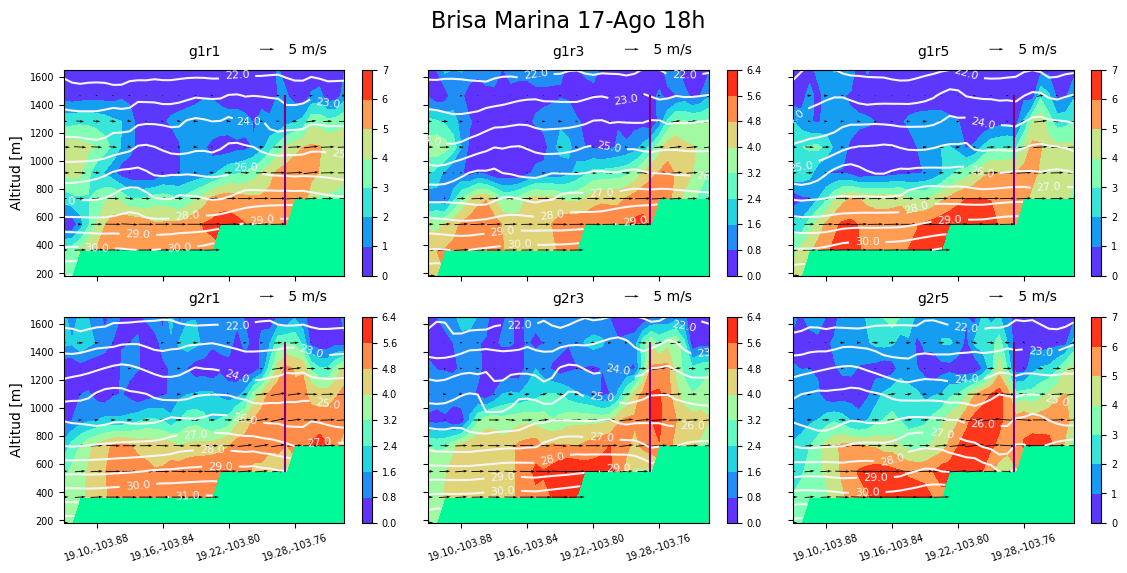

In [19]:
xp=0
tt=30+24+6
ang=30
hovtSBuv0(xp=xp,tt=tt*3,angle=ang,zbot=1,ztop=10)

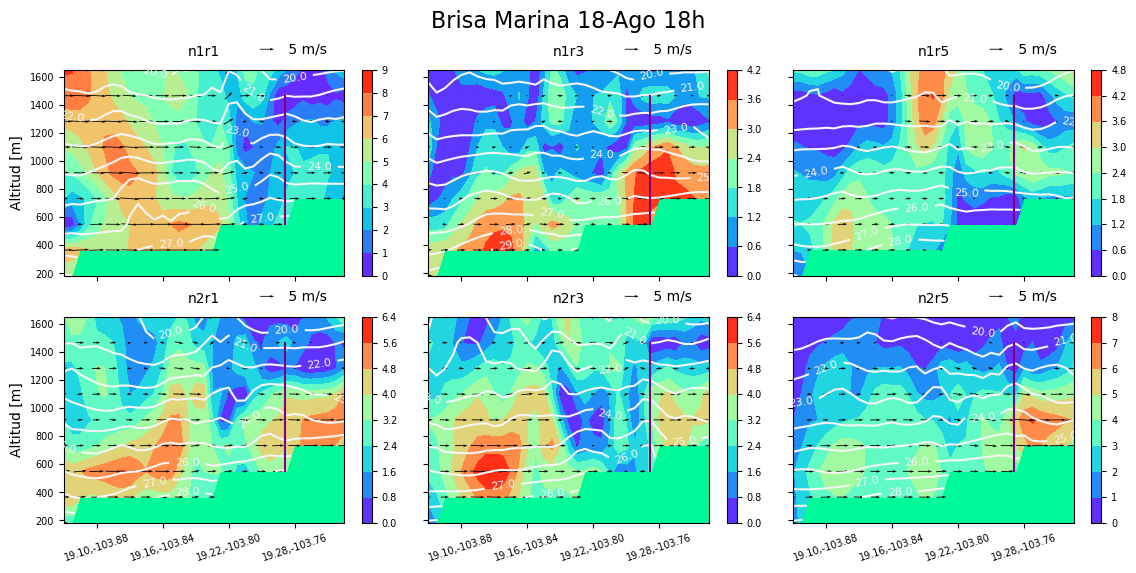

In [20]:
xp=6
tt=30+24+6+48
ang=30
hovtSBuv0(xp=xp,tt=tt*3,angle=ang,zbot=1,ztop=10)

In [21]:
xp=2
tt=80

fd ='../../../../../d03/'+expruns[xp]+'.nc'
ncfile = Dataset(fd)

angle = 220
ztop = 15
zbot = 1

uv, wd = getvar(ncfile, "wspd_wdir", units="m s-1", timeidx=tt)   
wa = getvar(ncfile, "wa", units="m s-1", timeidx=tt)
tv = getvar(ncfile, "tv", units="degC", timeidx=tt)
z = getvar(ncfile, "z", units="m", timeidx=tt)
# Define a pivot point and angle in grid coordinates
pivot_point = CoordPair(x=23, y=26)

# Calculate the vertical cross section.  By setting latlon to True, this
uv_vert = vertcross(uv, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:29]
wd_vert = vertcross(wd, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:29]
uv_pver = uv_vert*np.cos(np.radians(wd_vert-angle))   
w_vert = vertcross(wa, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:29]
tv_vert = vertcross(tv, z, pivot_point=pivot_point, angle=angle, latlon=True)[zbot:ztop,:29]
z_vert = uv_vert.vertical.values
coord_pairs = to_np(uv_vert.coords["xy_loc"])
size = coord_pairs.size 

plt.contourf(uv_vert)

In [12]:
# timestr = uv_vert["Time"].values
# timestr.
# time_as_string(t, unit='D')
# ds["time"].dt.strftime("%a, %b %d %H:%M")

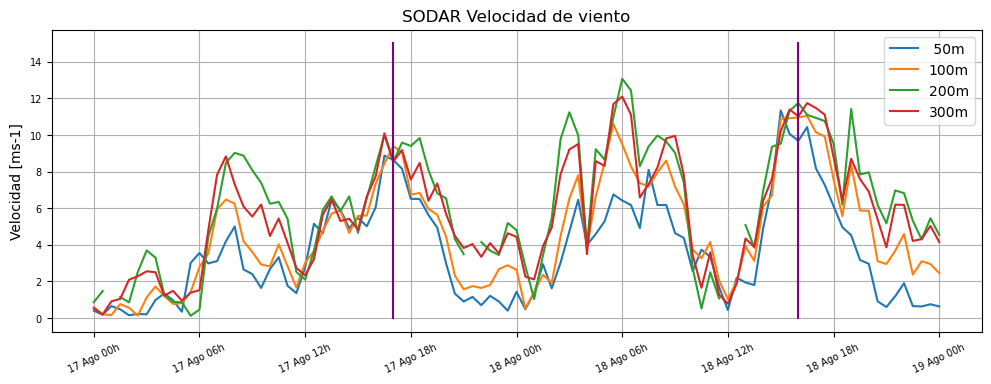

In [13]:
sp = pd.read_pickle('sodar_sp.pk')

fig = plt.figure(figsize=[12,4])
s50 =   sp['spd_50'][t1:t4]
s100 =  sp['spd_50'][t1:t4]
s100 = sp['spd_100'][t1:t4]
s200 = sp['spd_300'][t1:t4]
s300 = sp['spd_200'][t1:t4]

nx = s100.size
xdelta = 6
xloc = np.arange(nx)
tickname = s100[::xdelta*2].index.strftime('%d Ago %Hh').tolist()
plt.xticks(np.arange(nx)[::xdelta*2], tickname, rotation=25);
plt.plot(xloc, s50, label=' 50m')
plt.plot(xloc, s100, label='100m')
plt.plot(xloc, s200, label='200m')
plt.plot(xloc, s300, label='300m')

h = 16
#plt.plot([15]*h,range(h), color='purple')
plt.plot([34]*h,range(h), color='purple')
#plt.plot([60]*h,range(h), color='purple')
plt.plot([80]*h,range(h), color='purple')

plt.ylabel('Velocidad [ms-1]')
#plt.xlabel('Fecha')
plt.grid(True)
plt.legend()

plt.title('SODAR Velocidad de viento')
figname='wrf_spd_'
#plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)
plt.show()

tt = 24+34
ang = 210

for xp in range(0,12):
    hovtSBuv(xp=xp,tt=tt*3,angle=ang,zbot=1,ztop=10)

ang = 210
for xp in range(0,12):
    hovtSBuv(xp=xp,tt=tt*3,angle=ang,zbot=1,ztop=10)